# Linear Algebraic Background Subtraction For Full Vertically Binned Andor Newton

## Intro

This notebook demonstrates how to perform a linear algebraic based background subtraction

## Loading Libraries

In [1]:
from pylab import *
import h5py
from scipy.optimize import curve_fit
#from scipy.stats import binned_statistic_dd
from scipy.stats import binned_statistic_dd
import pickle
from scipy import stats
from scipy.stats.mstats import theilslopes
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import os

## Initializing Data

### Loading Data

In [3]:
#load data
experiment_run_name = "sxrlr0716run87.h5"
my_file = experiment_run_name
my_hdf5_object = h5py.File(my_file,"r")

### Converting hdf5 to Python Dictionary

In [6]:
#convert hdf5 to dict
my_list = []
def func(name, obj):
    my_list.append(name)

my_hdf5_object.visititems(func)
my_dict = {}
for i in my_list:
    try:
        my_dict[i] = array(my_hdf5_object[i])
    except:
        print(i)
pixel_to_femtosecond_list = []
width_list = []

andor_spec
dls


In [12]:
sum(my_dict['evr/code_162'])

11

## Visualizing Some Sample Data

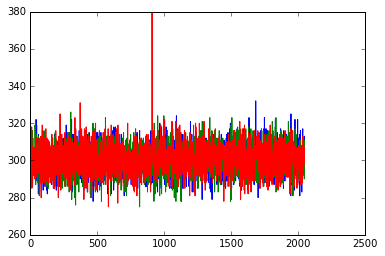

In [21]:
#plot some sample data
time_camera = 'andor_spec/image'
plot(my_dict[time_camera][10])
plot(my_dict[time_camera][2000])
plot(my_dict[time_camera][4000])
show()

## Isolating and Displaying Some Sample Backgrounds

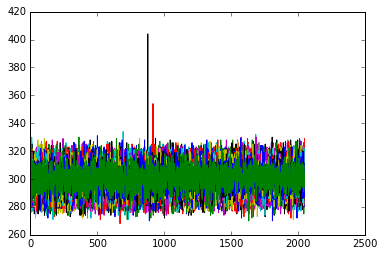

In [195]:
#identify background shots and plot some of them
my_dropped_shots = array(my_dict['evr/code_162']==1)              #this creates an array of booleans for dropped shots
#backgrounds = my_dict[time_camera][my_dropped_shots][::1]    #using the boolean array to select the dropped shots
backgrounds = my_dict[time_camera][:4000]
plot(backgrounds[:100].transpose())
show()

In [196]:
backgrounds.shape

(4000, 2048)

##  Eigen-Backgrounds

### Calculating Eigen Backgrounds Using SVD

In [248]:
#singular value decomposition on background shots. variable v contains the eigen backgrounds
#u,s,v = svd(backgrounds)
u,s,v = svd(fft(backgrounds,axis=1))
v=-real(ifft(v,axis=1))

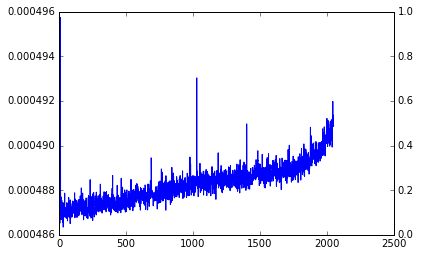

In [250]:
plot(v[0])
twinx()
#plot(mean(backgrounds,axis=0),'r')
#semilogy()
show()

### Showing Three Dominant Eigen Backgrounds

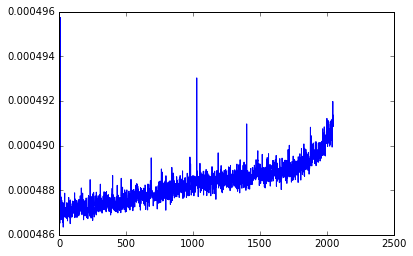

In [251]:
#showing some of the eigen backgrounds
plot(v[0])
#twinx()
#plot(v[1],'r-')
#plot(v[2],'g-')
show()

### Remove the Eigen-Backgrounds from the Data With X-ray Timing Signal

In [252]:
#subtracting the backgrounds from the data
svd_size = 5
background_subtracted = my_dict[time_camera] - dot(dot(my_dict[time_camera],v[:svd_size].transpose()),v[:svd_size])

### Visualizing the Eigen Background Subtracted Timing X-ray Laser Intersection Edge

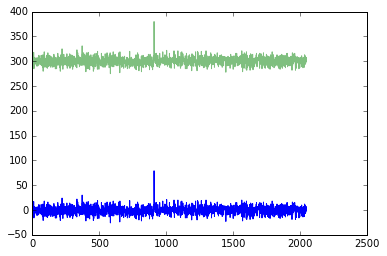

In [253]:
#plotting the background subtracted data
plot(my_dict[time_camera][4000]-median(my_dict[time_camera][4000]))
plot(background_subtracted[4000],alpha=0.5)
show()

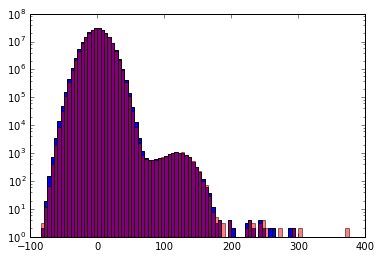

In [205]:
#comparing histograms
my_kernel = ones(4)
to_hist = (convolve(my_dict[time_camera].flatten()-mean(backgrounds),my_kernel,mode='valid'))
my_hist = hist(to_hist,log=True,bins=arange(-100,400,5),alpha=1.0)
to_hist1 = (convolve(background_subtracted.flatten(),my_kernel,mode='valid'))
my_hist1 = hist(to_hist1,log=True,bins=arange(-100,400,5),color='r',alpha=.5)
show()

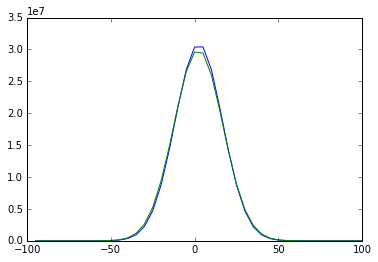

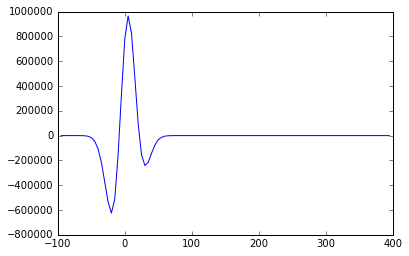

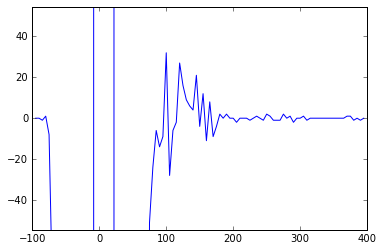

In [206]:
plot(my_hist[1][1:],(my_hist1[0]))
plot(my_hist[1][1:],(my_hist[0]))
xlim(-100,100)
show()
plot(my_hist[1][1:],(my_hist1[0]-my_hist[0]))
show()
plot(my_hist[1][1:],(my_hist1[0]-my_hist[0]))
ylim(-e**4,e**4)
show()

In [ ]:
my_power_spectrum = mean(abs(fft(my_dict['andor_spec/image'],axis=1)), axis=0)


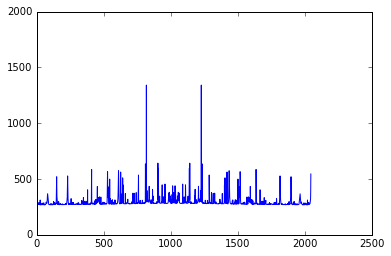

In [210]:
plot(my_power_spectrum)
ylim(0,2e3)
show()